# Kevin Alvarez Homework 5 CSC 217 Fall 2019

In [1]:
import scipy.stats as stats
import numpy as np
import seaborn as sns
%matplotlib inline

1) A tobacco company claims that the amount of nicotine in its cigarettes is a random variable with mean 2.2 mg and standard deviation .3 mg. 

a) What is the probability that a randomly chosen cigarette has more than 2.7 mg of nicotine?

In [2]:
dist = stats.norm(loc=2.2,scale=.3)
1 - dist.cdf(2.7)

0.047790352272814696

b) What is the probability that the sample mean of 100 randomly chosen cigarettes would be more than 2.7 mg of nicotine?

In [3]:
1 - stats.norm(loc=2.2, scale=.3 / np.sqrt(100)).cdf(2.7)

0.0

2) An instructor knows from past experience that student exam scores have mean
77 and standard deviation 15. At present the instructor is teaching two separate
classes — one of size 25 and the other of size 64.

a) What is the probability that a randomly chosen student has a test score between 72 and 82?

In [4]:
dist = stats.norm(loc=77,scale=15)
dist.cdf(82) - dist.cdf(72)

0.26111731963647267

b) Approximate the probability that the average test score in the class of size 25 lies between 72 and 82.

In [5]:
dist = stats.norm(loc=77,scale=15 / np.sqrt(25))
dist.cdf(82) - dist.cdf(72)

0.9044192954543706

c) Repeat part (a) for a class of size 64.

In [6]:
dist = stats.norm(loc=77,scale=15 / np.sqrt(64))
dist.cdf(82) - dist.cdf(72)

0.9923392388648204

c) Suppose the average scores in the two classes are 76 and 83. Which class, the one of size 25 or the one of size 64, do you think was more likely to have averaged 83?

25, as 83 is in the 97th percentile of that distribution as compared to being in the 99th+ percentile of the distribution of the class of 64.

3) If X is binomial with parameters n = 150, p = .6, compute the exact value of
P{X ≤ 80} and compare with its normal approximation both (a) making use of
and (b) not making use of the continuity correction.

In [7]:
dist = stats.binom(n=150, p=0.6)
dist.cdf(80)

0.05745956249718806

In [8]:
dist = stats.norm(dist.mean(),dist.std())
dist.cdf(80)

0.0477903522728147

4) Using the method we used at the end the workbook (running 10,000 simulations and finding the mean of each) for a random distribution, re-create the central limit theorem. Do this by:  
    a) Picking a distribution (either random or discrete) **NOT THE EXPONENTIAL DISTRIBUTION**   
    b) Finding the mean and standard deviation of the distribution.  
    c) Picking a sample size that you want to take the mean of (what sample size should you pick?)  
    d) Running 10,000 simulations where you find the mean of each sample.  
    e) Finding the mean and standard deviation of your result and comparing it to the mean and standard deviation of your original distribution, taking the sample size into account.  
    f) Plotting your result and confirming that it looks like a normal distribution.  

In [9]:
# A
dist = stats.binom(n=75, p=0.3)

In [10]:
# B
dist.mean()

22.5

In [11]:
# B
dist.std()

3.9686269665968856

In [12]:
# C
dist.rvs(500)

array([24, 25, 26, 23, 28, 24, 23, 29, 21, 18, 14, 17, 23, 21, 21, 26, 17,
       24, 24, 25, 21, 33, 22, 17, 23, 21, 22, 23, 23, 22, 25, 21, 17, 23,
       28, 22, 20, 26, 25, 24, 25, 26, 29, 24, 22, 18, 14, 23, 24, 21, 19,
       20, 26, 20, 19, 26, 28, 24, 27, 25, 24, 20, 20, 26, 24, 23, 30, 18,
       21, 24, 27, 32, 21, 21, 23, 25, 29, 16, 27, 29, 17, 24, 25, 22, 21,
       22, 20, 21, 22, 28, 21, 17, 16, 21, 26, 23, 19, 21, 24, 21, 17, 28,
        9, 20, 29, 16, 20, 24, 25, 25, 21, 22, 17, 24, 15, 20, 26, 23, 24,
       22, 20, 25, 23, 22, 23, 20, 22, 24, 34, 21, 22, 18, 26, 23, 22, 24,
       22, 20, 19, 24, 22, 22, 18, 21, 21, 23, 24, 31, 27, 18, 18, 18, 24,
       22, 21, 20, 14, 20, 29, 20, 23, 22, 25, 20, 24, 18, 22, 25, 25, 24,
       26, 22, 19, 15, 28, 22, 23, 29, 25, 21, 25, 26, 22, 21, 20, 23, 23,
       24, 28, 20, 20, 25, 24, 26, 18, 21, 24, 19, 16, 25, 29, 19, 17, 20,
       24, 24, 23, 19, 17, 24, 20, 20, 23, 14, 25, 21, 22, 23, 27, 27, 20,
       29, 22, 26, 24, 25

In [13]:
# D
np.random.seed(42)
simulation = np.array([])
for i in range(10000):
    simulation = np.append(simulation, np.mean(dist.rvs(500)))

In [14]:
# E
print(dist.mean(), np.mean(simulation))
print(dist.std(), np.std(simulation))

22.5 22.4997918
3.9686269665968856 0.17634576562186005


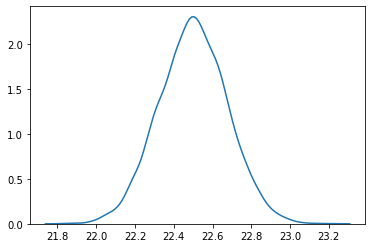

In [15]:
# F
sns.kdeplot(simulation)